## Visualizing and Representing Bivariate Relationships

In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import scipy.stats as stats

In [17]:
sbn.set_style("white") # get rid of seaborn grid lines

In [18]:
irisurl ="https://raw.githubusercontent.com/Bio204-class/bio204-datasets/master/iris.csv"
iris = pd.read_csv(irisurl)

In [19]:
iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [20]:
# rename columns for convenience
iris.columns = iris.columns.str.replace('.', '')
iris.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [21]:
setosa = iris[iris.Species == 'setosa']
versicolor = iris[iris.Species == 'versicolor']
virginica = iris[iris.Species == 'virginica']

### Scatter plot

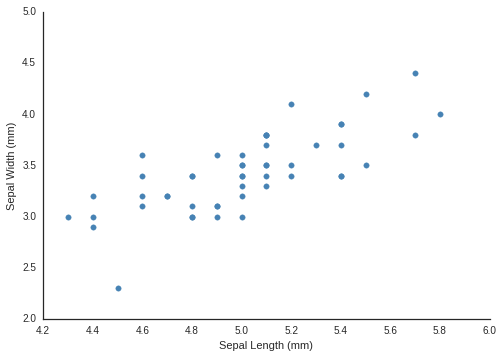

In [38]:
# using pyplot.scatter
fig, ax = plt.subplots()
ax.scatter(setosa.SepalLength, setosa.SepalWidth, marker='o', s=30, color='steelblue')
ax.set_xlabel('Sepal Length (mm)')
ax.set_ylabel('Sepal Width (mm)')
sbn.despine()
pass

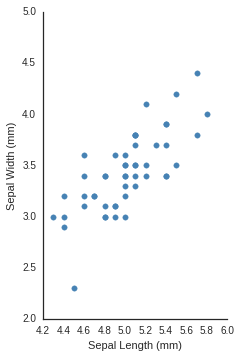

In [72]:
# as above but with equal aspect ratio
fig, ax = plt.subplots()
ax.scatter(setosa.SepalLength, setosa.SepalWidth, marker='o', s=30, color='steelblue')
ax.set_xlabel('Sepal Length (mm)')
ax.set_ylabel('Sepal Width (mm)')
ax.set_aspect('equal') # <-- aspect ratio specified here
sbn.despine()
pass

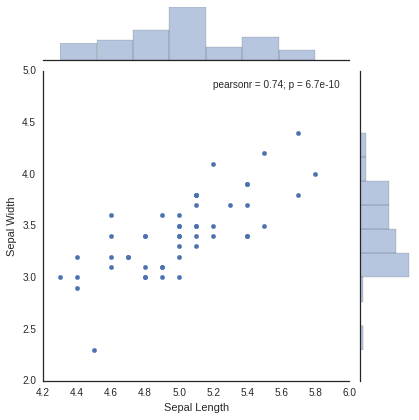

In [71]:
# using seaborn.jointplot
# note that jointplot returns an object of type JointGrid
# Since there are three sets of axes, the JointGrid
# object provide a function `set_axis_labels`
# to properly set labels
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.JointGrid.html

g = sbn.jointplot(setosa.SepalLength, setosa.SepalWidth)
g.set_axis_labels("Sepal Length", "Sepal Width")
pass

### Density plots

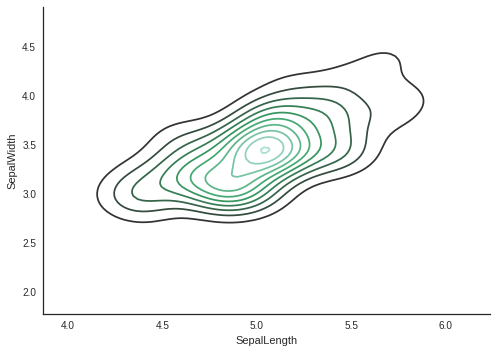

In [68]:
sbn.kdeplot(setosa.SepalLength, setosa.SepalWidth)
sbn.despine()
pass

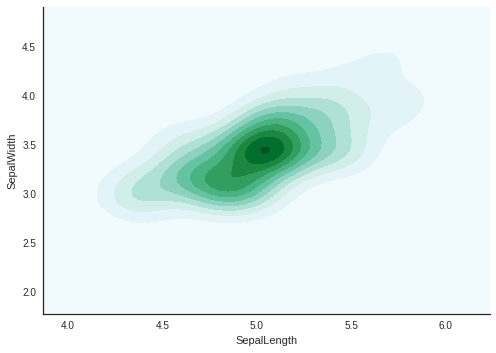

In [103]:
sbn.kdeplot(setosa.SepalLength, setosa.SepalWidth, shade=True)
sbn.despine()
pass

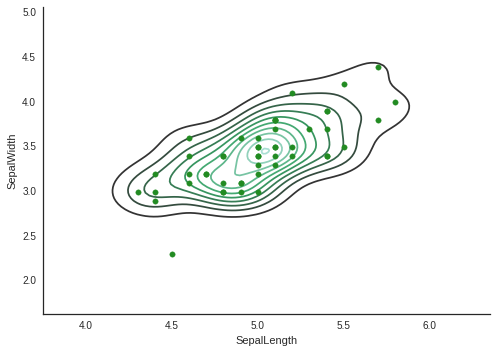

In [83]:
sbn.kdeplot(setosa.SepalLength, setosa.SepalWidth)
# the zorder argument makes sure the points are drawn on top of the
# density contours
plt.scatter(setosa.SepalLength, setosa.SepalWidth, color='forestgreen', s=30, zorder=10)
sbn.despine()
pass

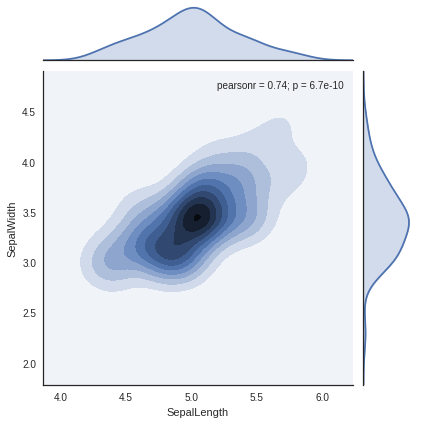

In [122]:
sbn.jointplot(setosa.SepalLength, setosa.SepalWidth, kind='kde')
pass

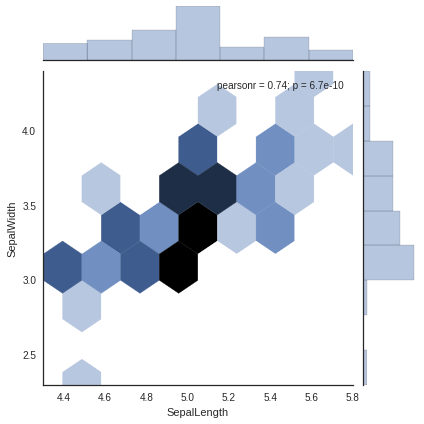

In [123]:
sbn.jointplot(setosa.SepalLength, setosa.SepalWidth, kind='hex')
pass

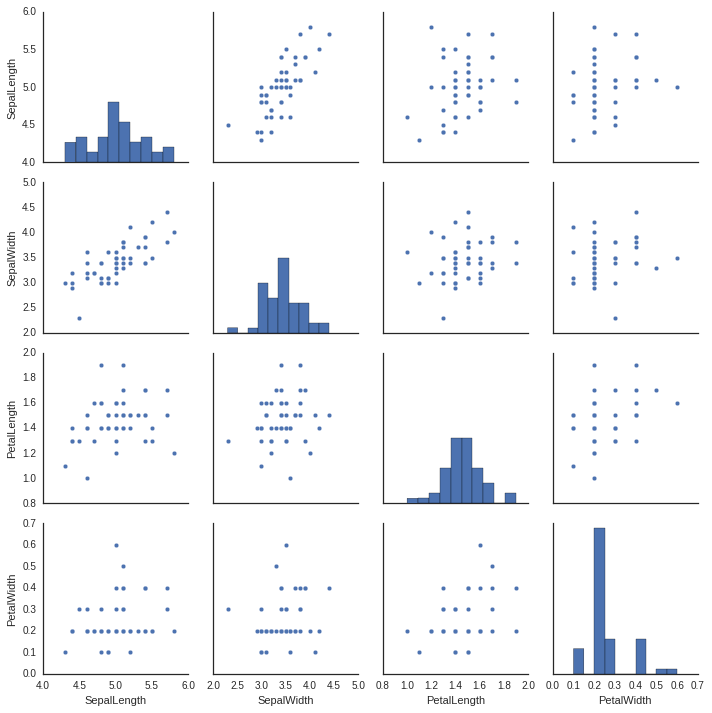

In [120]:
sbn.pairplot(setosa)
pass

## Linear vs Non-linear relationships

In the plot below there is a relationship between $x$ and $y$ but it is non-linear.

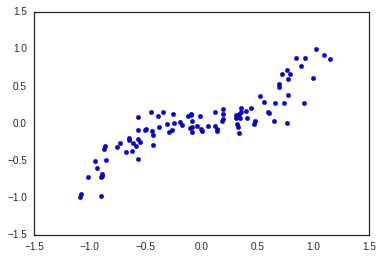

In [119]:
x = np.linspace(-1,1,100) + stats.norm.rvs(0,0.1,size=100)
y = (np.linspace(-1,1,100))**3 + stats.norm.rvs(0,0.1,size=100)
plt.scatter(x,y)
pass

## Statistical measures of association

### covariance

In [100]:
# ddof = 1 gives us the sample covariance
np.cov(setosa.SepalLength, setosa.SepalWidth, ddof=1) 

array([[ 0.12424898,  0.09921633],
       [ 0.09921633,  0.1436898 ]])

In [98]:
# using cov method on pandas data frame
setosa[["SepalWidth","SepalLength"]].cov()

,SepalWidth,SepalLength
SepalWidth,0.143690,0.099216
SepalLength,0.099216,0.124249


In [102]:
# will generate covariance matrix for all pairs of variables
setosa.cov()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.124249,0.099216,0.016355,0.010331
SepalWidth,0.099216,0.143690,0.011698,0.009298
PetalLength,0.016355,0.011698,0.030159,0.006069
PetalWidth,0.010331,0.009298,0.006069,0.011106


### correlation

In [125]:
np.corrcoef(setosa.SepalLength, setosa.SepalWidth, ddof=1)

array([[ 1.        ,  0.74254669],
       [ 0.74254669,  1.        ]])

In [128]:
setosa[['SepalLength','SepalWidth']].corr()

,SepalLength,SepalWidth
SepalLength,1.000000,0.742547
SepalWidth,0.742547,1.000000


In [129]:
setosa.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,0.742547,0.267176,0.278098
SepalWidth,0.742547,1.000000,0.177700,0.232752
PetalLength,0.267176,0.177700,1.000000,0.331630
PetalWidth,0.278098,0.232752,0.331630,1.000000


## Anscombe's quartet -- a cautionary tale

In [130]:
# anscombe's synthetic data set is included in seaborn
anscombe = sbn.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10,8.04
1,I,8,6.95
2,I,13,7.58
3,I,9,8.81
4,I,11,8.33


The basic descriptive stats for $x$ and $y$ for each of the groups is quite similar.

In [131]:
anscombe.groupby('dataset').describe()

x          y
dataset                            
I       count  11.000000  11.000000
        mean    9.000000   7.500909
        std     3.316625   2.031568
        min     4.000000   4.260000
        25%     6.500000   6.315000
        50%     9.000000   7.580000
        75%    11.500000   8.570000
        max    14.000000  10.840000
II      count  11.000000  11.000000
        mean    9.000000   7.500909
        std     3.316625   2.031657
        min     4.000000   3.100000
        25%     6.500000   6.695000
        50%     9.000000   8.140000
        75%    11.500000   8.950000
        max    14.000000   9.260000
III     count  11.000000  11.000000
        mean    9.000000   7.500000
        std     3.316625   2.030424
        min     4.000000   5.390000
        25%     6.500000   6.250000
        50%     9.000000   7.110000
        75%    11.500000   7.980000
        max    14.000000  12.740000
IV      count  11.000000  11.000000
        mean    9.000000   7.500909
        std     3.316625   2.030579
        min     8.000000   5.250000
        25%     8.000000   6.170000
        50%     8.000000   7.040000
        75%     8.000000   8.190000
        max    19.000000  12.500000

In [132]:
groupI = anscombe[anscombe.dataset == "I"]
groupII = anscombe[anscombe.dataset == "II"]
groupIII = anscombe[anscombe.dataset == "III"]
groupIV = anscombe[anscombe.dataset == "IV"]

The pairwise correlations within the groups look very similar

In [133]:
groupI.corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


In [134]:
groupII.corr()

,x,y
x,1.000000,0.816237
y,0.816237,1.000000


In [135]:
groupIII.corr()

,x,y
x,1.000000,0.816287
y,0.816287,1.000000


In [136]:
groupIV.corr()

,x,y
x,1.000000,0.816521
y,0.816521,1.000000


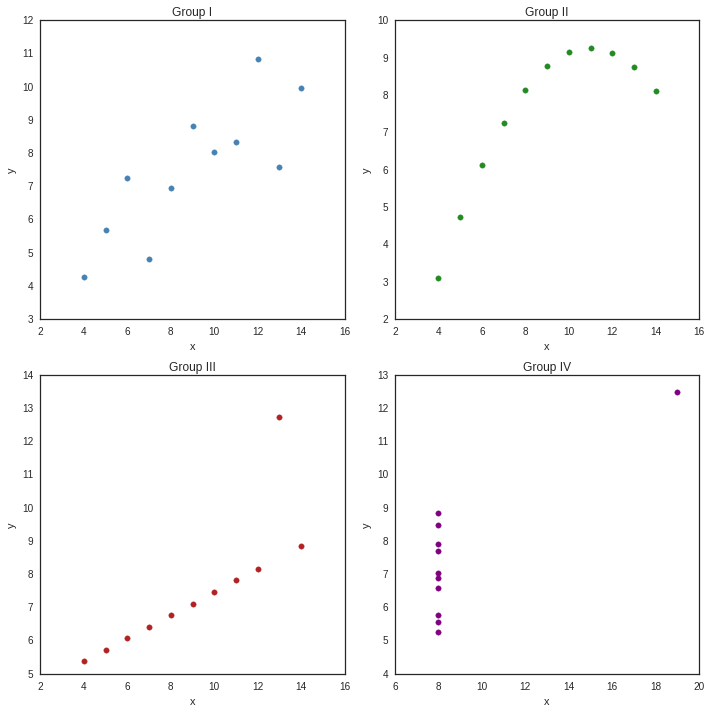

In [147]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
ax1.scatter(groupI.x, groupI.y, color='steelblue', s=30)
ax2.scatter(groupII.x, groupII.y, color='forestgreen', s=30)
ax3.scatter(groupIII.x, groupIII.y, color='firebrick', s=30)
ax4.scatter(groupIV.x, groupIV.y, color='purple', s=30)

for ax in (ax1,ax2,ax3,ax4):
    ax.set_xlabel('x')
    ax.set_ylabel('y')

ax1.set_title("Group I")
ax2.set_title("Group II")
ax3.set_title("Group III")
ax4.set_title("Group IV")

fig.tight_layout()

pass